### Feature Selection Exercie

In this exercise, we will apply Feature Selection to a Iris flowers dataset, where the target variable is the Species. Essentially, our goal is to identify the features that are most relevant in discerning the species of each Iris flower. The dataset is from: https://www.kaggle.com/datasets/uciml/iris
You can view the demos found in the repository for some methods.

1. Load the dataset from the exercise's Github Repository (Iris.csv)
2. Using buisness logic/common sense, drop features that are surely irrevelvant to the target variable.
3. Preprocess your data (split data into training and testing)
4. Apply feature selection using any 3 (three) different methods:
(Hint) Since the target variable, Species, is categorical, you can apply the numerical methods on the numerical predictor variables against themselves instead to reduce Feature redundancy.
    - Pearson's correlation coefficient (r)
    - Kendall's tau (τ)
    - Mutual Information (MI)
    - Logistic Regression with L1 penalty
    - Any other method/model of Feature Selection....
6. Compare the results of each feature selection method:
    - What features did you manually dropped before applying the feature selection methods? Explain why.
    - Are there any common features selected across multiple methods?
    - Can you explain why certain features were selected based on their characteristics?
(Optional) Visualize the importance of features using techniques like bar charts or heatmaps to make it easier to compare.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from scipy.stats import kendalltau
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,YearCollected,MonthCollected,StigmaLegnth,Species
0,1,5.1,3.5,1.4,0.2,Purple,2003,2,2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Orange,1998,9,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Black,1995,5,3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,White,2008,3,3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Teal,2007,9,1,Iris-setosa


In [3]:
data = data.dropna()

le = LabelEncoder()
data["FlowerColour"] = le.fit_transform(data["FlowerColour"])
data["Species"] = le.fit_transform(data["Species"])

X = data.drop("Species", axis=1)
y = data["Species"]
X = X.drop(['Id','YearCollected','MonthCollected'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
y_train_df = pd.DataFrame(y_train, columns=['Target'])

def pearson_corr(X, y):
    return X_train.corrwith(y_train_df['Target']).abs()

k = 3
selector = SelectKBest(score_func=pearson_corr, k=k)
selected_features_r = selector.fit(X_train, y_train).get_support(indices=True)

print("r features:", X_train.columns[selected_features_r])

tau_values = []
for feature in X_train.columns:
    tau, _ = kendalltau(X_train[feature], y_train)
    tau_values.append(abs(tau))

k = 3
selector = SelectKBest(score_func=lambda X, y: (tau_values, [0] * len(tau_values)), k=k)
selected_features_tau = selector.fit(X_train, y_train).get_support(indices=True)

print("tau features:", X_train.columns[selected_features_tau])

mi_scores = mutual_info_regression(X_train, y_train)

k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selected_features_mi = selector.fit(X_train, y_train).get_support(indices=True)

print("MI features:", X_train.columns[selected_features_mi])

log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
model = SelectFromModel(log_reg, prefit=True)
selected_features_lr  = X.columns[model.get_support()]

print("LR features:", selected_features_lr )


r features: Index(['PetalWidthCm', 'FlowerColour', 'StigmaLegnth'], dtype='object')
tau features: Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
MI features: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')
LR features: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'FlowerColour',
       'StigmaLegnth'],
      dtype='object')


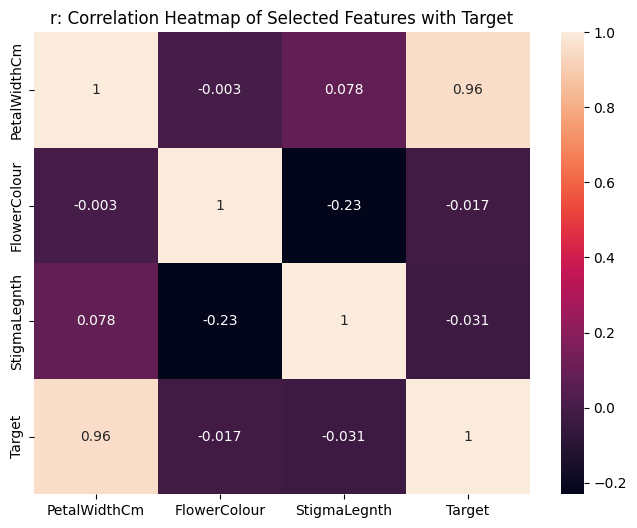

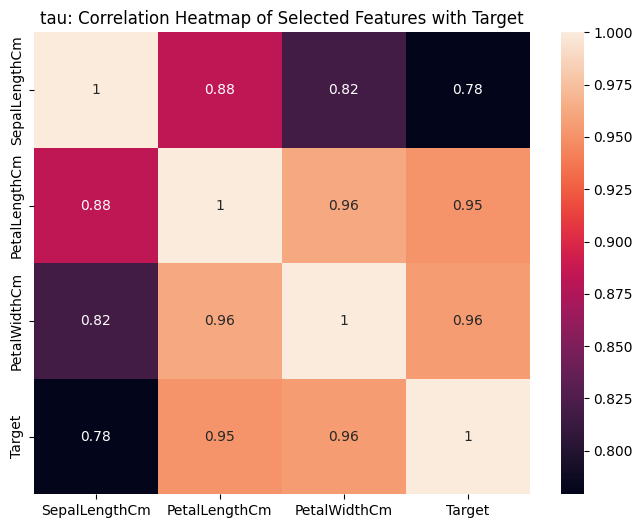

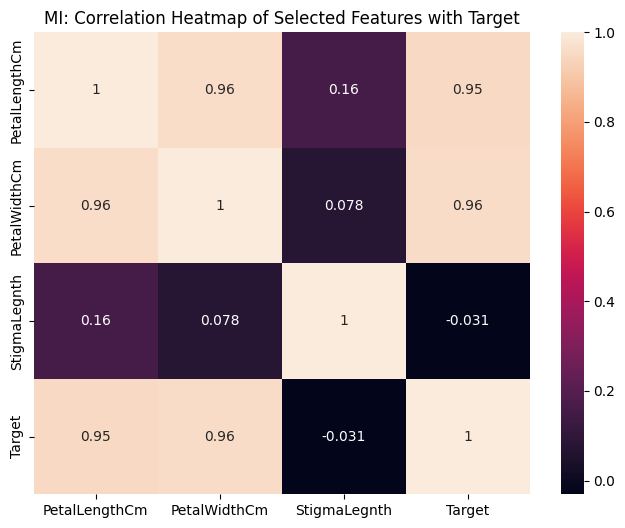

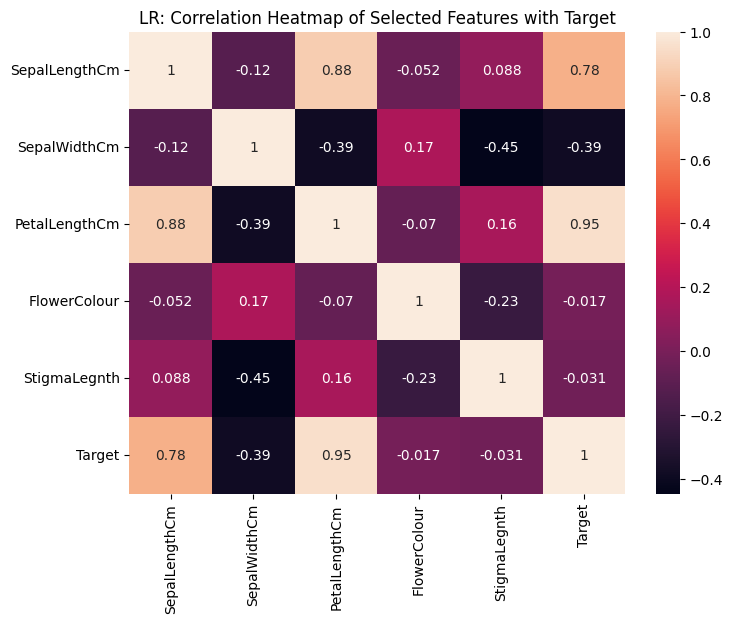

In [11]:
r = X_train[X_train.columns[selected_features_r]].copy()
r['Target'] = y_train
correlation_matrix = r.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('r: Correlation Heatmap of Selected Features with Target')
plt.show()

tau = X_train[X_train.columns[selected_features_tau]].copy()
tau['Target'] = y_train
correlation_matrix = tau.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('tau: Correlation Heatmap of Selected Features with Target')
plt.show()

mi = X_train[X_train.columns[selected_features_mi]].copy()
mi['Target'] = y_train
correlation_matrix = mi.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('MI: Correlation Heatmap of Selected Features with Target')
plt.show()

lr = X_train[selected_features_lr].copy()
lr['Target'] = y_train
correlation_matrix = lr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('LR: Correlation Heatmap of Selected Features with Target')
plt.show()

[0.08120193 0.04055588 0.28949281 0.25761403 0.00580603 0.32532932]


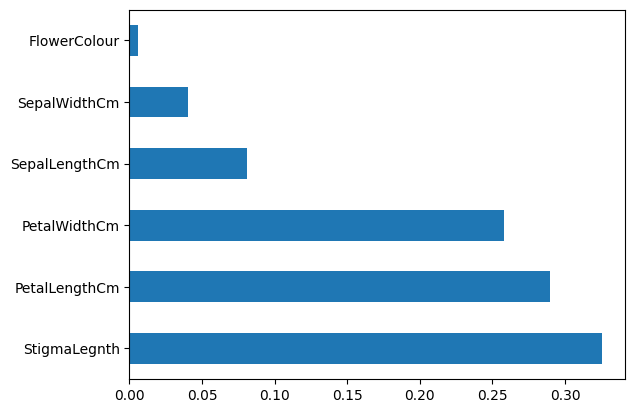

In [7]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 
model = ExtraTreesClassifier() 
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Compare the results of each feature selection method:
- What features did you manually dropped before applying the feature selection methods? Explain why.
    - Features 'Id', 'YearCollected', and 'MonthCollected' were dropped because they were irrelevant to predicting the target variable
- Are there any common features selected across multiple methods?
    - PetalLengthCm is common in all methods.
- Can you explain why certain features were selected based on their characteristics?
    - Pearson Correlation (r) and Kendall Tau (tau): These methods select features based on their correlation (linear or rank correlation) with the target variable. Features highly correlated (positively or negatively) with the target tend to be selected.
    - Mutual Information (MI): It measures the dependency between variables. Features with high mutual information scores are chosen, indicating a strong relationship with the target variable.
    - Logistic Regression (LR): Selects features based on their coefficients in the logistic regression model. Non-zero coefficients indicate the importance of features in predicting the target.